<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Проверка-recovery-для-rougher.output.recovery." data-toc-modified-id="Проверка-recovery-для-rougher.output.recovery.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Проверка recovery для rougher.output.recovery.</a></span></li><li><span><a href="#Проверка-recovery-для-final.output.recovery." data-toc-modified-id="Проверка-recovery-для-final.output.recovery.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверка recovery для final.output.recovery.</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изменение-Au" data-toc-modified-id="Изменение-Au-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изменение Au</a></span></li><li><span><a href="#Изменение--Ag" data-toc-modified-id="Изменение--Ag-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Изменение  Ag</a></span></li><li><span><a href="#Изменение-Pb" data-toc-modified-id="Изменение-Pb-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Изменение Pb</a></span></li><li><span><a href="#Сравним-распределение-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках." data-toc-modified-id="Сравним-распределение-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках.-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Сравним распределение размеров гранул сырья на обучающей и тестовой выборках.</a></span></li><li><span><a href="#Исследуем-суммарную-концентрацию-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах." data-toc-modified-id="Исследуем-суммарную-концентрацию-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах.-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#sMAPE." data-toc-modified-id="sMAPE.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>sMAPE.</a></span></li><li><span><a href="#Обучение-разныx-моделей" data-toc-modified-id="Обучение-разныx-моделей-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучение разныx моделей</a></span><ul class="toc-item"><li><span><a href="#DecisionTreeRegressor" data-toc-modified-id="DecisionTreeRegressor-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>DecisionTreeRegressor</a></span></li><li><span><a href="#RandomForestRegressor" data-toc-modified-id="RandomForestRegressor-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>RandomForestRegressor</a></span></li><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>LinearRegression</a></span></li></ul></li><li><span><a href="#Проверим-лучшую-модель-на-тестовой-выборки." data-toc-modified-id="Проверим-лучшую-модель-на-тестовой-выборки.-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Проверим лучшую модель на тестовой выборки.</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [46]:
#библиотеки
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import RandomState
from sklearn.tree import DecisionTreeRegressor 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score, make_scorer
from tqdm import tqdm
from sklearn.dummy import DummyRegressor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import warnings

In [47]:
df = pd.read_csv('/datasets/gold_recovery_full_new.csv')
df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')

In [48]:
print(df.info())
print('-' * 100)

print('ПРОПУСКИ df')
print(df.isna().sum())
print('-' * 100)
      
print('ДУБЛИКАТЫ df', df.duplicated().sum())
print('-' * 100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [49]:
print(df_train.info())
print('-' * 100)

print('ПРОПУСКИ df_train')
print(df_train.isna().sum())
print('-' * 100)
      
print('ДУБЛИКАТЫ df_train', df_train.duplicated().sum())
print('-' * 100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [50]:
print(df_test.info())
print('-' * 100)

print('ПРОПУСКИ df')
print(df_test.isna().sum())
print('-' * 100)
      
print('ДУБЛИКАТЫ df', df_test.duplicated().sum())
print('-' * 100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

Данные индексируются датой и временем получения информации (признак date). Соседние по времени параметры часто похожи.(из условия)

In [51]:
df.date = pd.to_datetime(df.date, format='%Y-%m-%d %H:%M:%S')
df_train.date = pd.to_datetime(df_train.date, format='%Y-%m-%d %H:%M:%S')
df_test.date = pd.to_datetime(df_test.date, format='%Y-%m-%d %H:%M:%S')

In [52]:
#избавились от попусков
df = df.fillna(method='ffill')
df_train = df_train.fillna(method='ffill')
df_test = df_test.fillna(method='ffill')

### Проверка recovery для rougher.output.recovery.

Проверим, что эффективность обогащения рассчитана правильно. 
Вычислим её на обучающей выборке для признака rougher.output.recovery. 
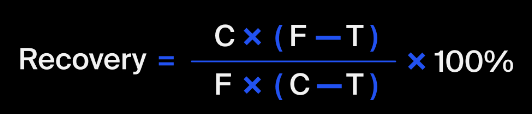

* C — доля золота в концентрате после флотации/очистки; rougher.output.concentrate_au
* F — доля золота в сырье/концентрате до флотации/очистки; rougher.input.feed_au 
* T — доля золота в отвальных хвостах после флотации/очистки. rougher.output.tail_au

In [53]:
C = df_train['rougher.output.concentrate_au']
F = df_train['rougher.input.feed_au']
T = df_train['rougher.output.tail_au']
check_recovery = ((C * (F - T)) / (F * (C - T))) * 100
check_recovery_train = pd.DataFrame({'check_recovery_train': check_recovery, 'rougher.output.recovery': df_train['rougher.output.recovery']})
print(check_recovery_train.head())
print('Mean Absolute Error:', mean_absolute_error(df_train['rougher.output.recovery'], check_recovery))

   check_recovery_train  rougher.output.recovery
0             87.107763                87.107763
1             86.843261                86.843261
2             86.842308                86.842308
3             87.226430                87.226430
4             86.688794                86.688794
Mean Absolute Error: 9.73512347450521e-15


MAE не сильно большое 9,7. Можно сказать что эффективность обогащения рассчитана правильно, погрешность достаточно мала. 

### Проверка recovery для final.output.recovery.

Эффективность обогащения финального концентрата final.output.recovery. 
* C — доля золота в концентрате после флотации/очистки; final.output.concentrate_au 
* F — доля золота в сырье/концентрате до флотации/очистки; rougher.input.feed_au 
* T — доля золота в отвальных хвостах после флотации/очистки. final.output.tail_au 

In [54]:
C = df_train['final.output.concentrate_au']
F = df_train['rougher.input.feed_au']
T = df_train['final.output.tail_au']
check_recovery_final = ((C * (F - T)) / (F * (C - T))) * 100
check_recovery_final_train = pd.DataFrame({'check_recovery_final_train': check_recovery_final, 'final.output.recovery': df_train['final.output.recovery']})
print('Mean Absolute Error:', mean_absolute_error(df_train['final.output.recovery'], check_recovery_final))

Mean Absolute Error: 8.538049763979541e-15


Проанализируйте признаки, недоступные в тестовой выборке. Сравним их с признаками обучающей выборки. 

    (из условия) Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков.

In [55]:
#колличество колонок
print('df_train', df_train.shape[1])
print('df_test', df_test.shape[1])

df_train 87
df_test 53


In [56]:
df_train_columns = pd.Series(df_train.columns)
df_test_columns = pd.Series(df_test.columns)
inaccessible_signs = df_train_columns.loc[~df_train_columns.isin(df_test_columns)]
print('Колличество недоступных признаков:', inaccessible_signs.count())

Колличество недоступных признаков: 34


In [57]:
inaccessible_signs

1                           final.output.concentrate_ag
2                           final.output.concentrate_pb
3                          final.output.concentrate_sol
4                           final.output.concentrate_au
5                                 final.output.recovery
6                                  final.output.tail_ag
7                                  final.output.tail_pb
8                                 final.output.tail_sol
9                                  final.output.tail_au
14                primary_cleaner.output.concentrate_ag
15                primary_cleaner.output.concentrate_pb
16               primary_cleaner.output.concentrate_sol
17                primary_cleaner.output.concentrate_au
18                       primary_cleaner.output.tail_ag
19                       primary_cleaner.output.tail_pb
20                      primary_cleaner.output.tail_sol
21                       primary_cleaner.output.tail_au
30        rougher.calculation.sulfate_to_au_conc

Отсутствуют параметры: 
* final.output. ... - финальные характеристики параметра продукта, такие данные получают в конце технологического процесса 
* primary_cleaner.output. ... - первичная очистка параметра продукта, отсутствует для концентратов и хвостов.
* rougher.calculation. ... - флотация расчётных характеристик
* rougher.output. ... - флотация параметра продукта, отсутствуют и концентраты и эффективность и хвосты.
* secondary_cleaner.output. ... -  вторичная очистка параметра продукта, отсутствуют только у хвостов

Отсутствуют два целевых признака: rougher.output.recovery и final.output.recovery. Добавим их в тестовую выборку. 

In [58]:
df_test = df_test.merge(df.loc[:, ['date','rougher.output.recovery','final.output.recovery']], on='date', how='left')
df_test.shape[1]

55

In [59]:
df_test.isna().sum()

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

## Анализ данных

Рассмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.
### Изменение Au

In [60]:
def graph(x1, lx1, x2, lx2, x3, lx3, x4, lx4, title):
    plt.figure(figsize=(15,7), dpi= 80)
    plt.hist(x1, density = True, histtype ='bar', color = 'blue', label = lx1, edgecolor = 'black', bins = int(180/10), alpha=0.5) 
    plt.hist(x2, density = True, histtype ='bar', color = 'pink', label = lx2, edgecolor = 'black', bins = int(180/10), alpha=0.3) 
    plt.hist(x3, density = True, histtype ='bar', color = 'orange', label = lx3, edgecolor = 'black', bins = int(180/10),  alpha=0.3)
    plt.hist(x4, density = True, histtype ='bar', color = 'green', label = lx4, edgecolor = 'black', bins = int(180/10), alpha=0.3) 
    plt.legend(prop ={'size': 10}) 
    plt.title(title)
    plt.show()


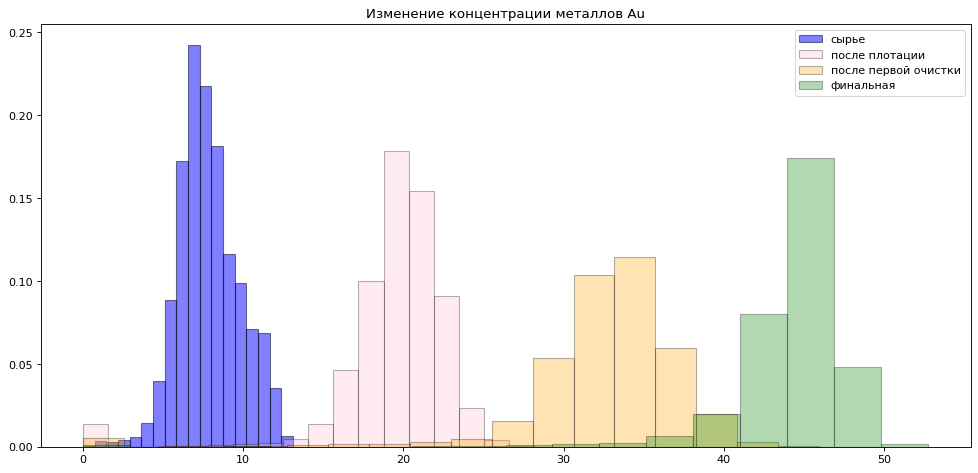

In [61]:
graph(df_train['rougher.input.feed_au'], 
      'сырье', 
      df_train['rougher.output.concentrate_au'], 
      'после плотации', 
      df_train['primary_cleaner.output.concentrate_au'], 
      'после первой очистки', 
      df_train['final.output.concentrate_au'], 
      'финальная', 
      'Изменение концентрации металлов Au')

Концентрация металлов постоянно повышалась. В финальной обраотке концентрация самая высокая.

### Изменение  Ag

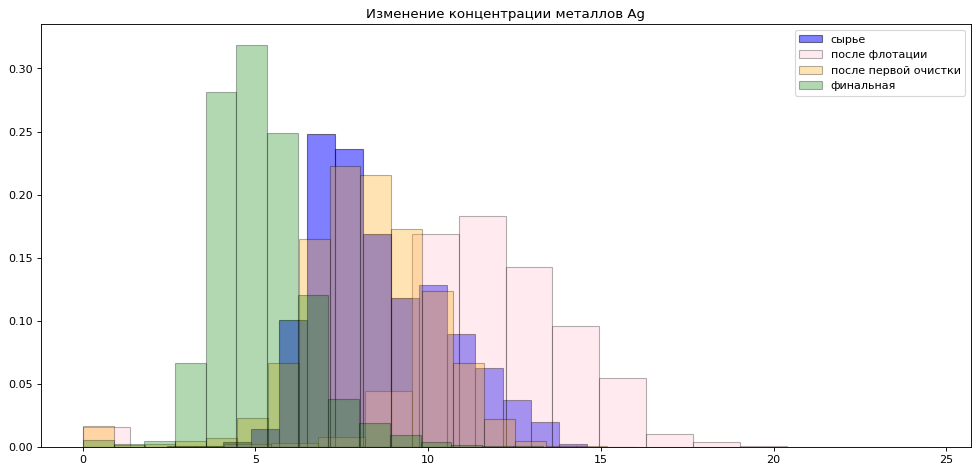

In [62]:
# ПЕРВЫЙ вариант
graph(df_train['rougher.input.feed_ag'], 
      'сырье', 
      df_train['rougher.output.concentrate_ag'], 
      'после флотации', 
      df_train['primary_cleaner.output.concentrate_ag'], 
      'после первой очистки', 
      df_train['final.output.concentrate_ag'], 
      'финальная', 
      'Изменение концентрации металлов Ag')

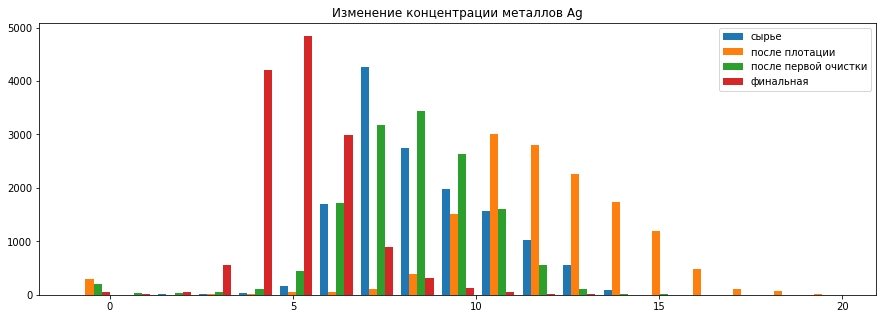

In [63]:
# ВТОРОЙ вариант
bins = np.linspace(-1, 20, 20)
plt.figure(figsize=(15,5))
plt.hist([df_train['rougher.input.feed_ag'], 
          df_train['rougher.output.concentrate_ag'],
         df_train['primary_cleaner.output.concentrate_ag'],
         df_train['final.output.concentrate_ag']], 
         bins, 
         label=['сырье', 'после плотации', 'после первой очистки', 'финальная'])
plt.legend(loc='upper right')
plt.title('Изменение концентрации металлов Ag')
plt.show()

Концентрация металлов после флотации повысилась достаточно сильно, после первой очистки понизилась, и финальная доля концентрации в большинстве еще понизилась.

### Изменение Pb

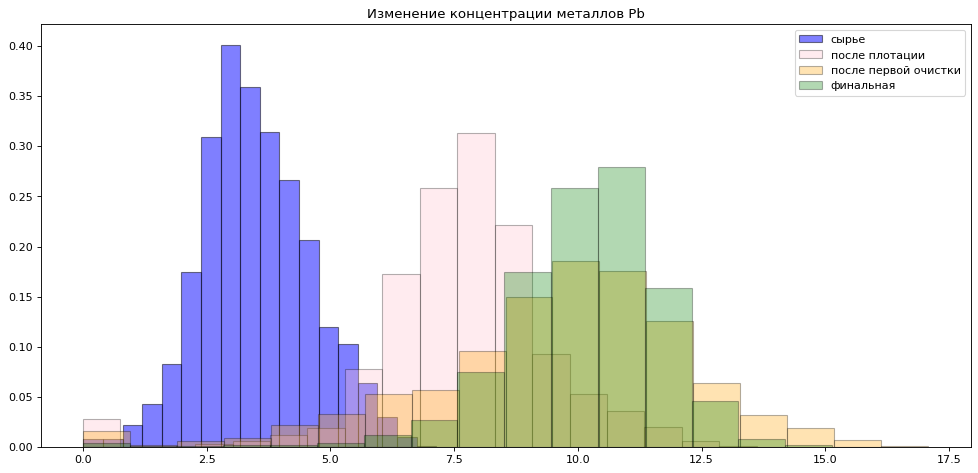

In [64]:
# ПЕРВЫЙ вариант
graph(df_train['rougher.input.feed_pb'], 
      'сырье', 
      df_train['rougher.output.concentrate_pb'], 
      'после плотации', 
      df_train['primary_cleaner.output.concentrate_pb'], 
      'после первой очистки', 
      df_train['final.output.concentrate_pb'], 
      'финальная', 
      'Изменение концентрации металлов Pb')

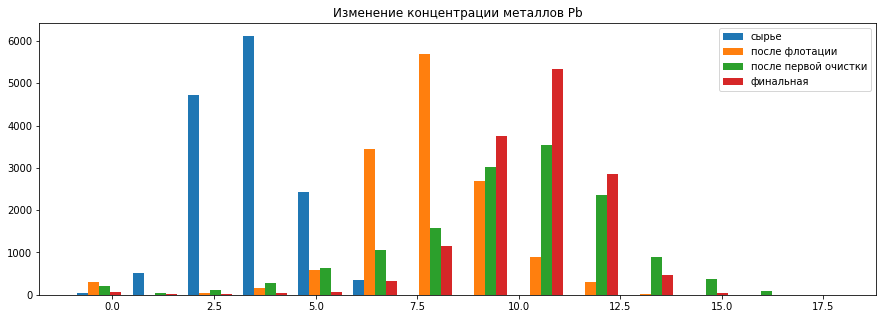

In [65]:
# ВТОРОЙ вариант
bins = np.linspace(-1, 18, 15)
plt.figure(figsize=(15,5))
plt.hist([df_train['rougher.input.feed_pb'], 
          df_train['rougher.output.concentrate_pb'],
         df_train['primary_cleaner.output.concentrate_pb'],
         df_train['final.output.concentrate_pb']], 
         bins, 
         label=['сырье', 'после флотации', 'после первой очистки', 'финальная'])
plt.legend(loc='upper right')
plt.title('Изменение концентрации металлов Pb')
plt.show()

Концентрация металлов после флотации повысилась, а после первой очистки и финальная почти на одном уровне. 

### Сравним распределение размеров гранул сырья на обучающей и тестовой выборках.

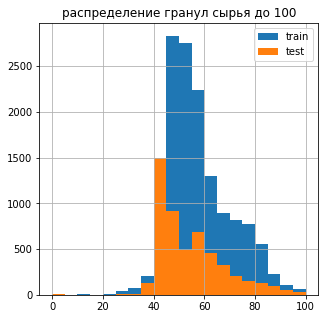

In [66]:
#после флотации
plt.figure(figsize=(5,5))
df_train['rougher.input.feed_size'].hist(bins=20, label='train', range=(0,100))
df_test['rougher.input.feed_size'].hist(bins=20, label='test', range=(0,100))
plt.legend(loc='upper right')
plt.title('распределение гранул сырья до 100')
plt.show()

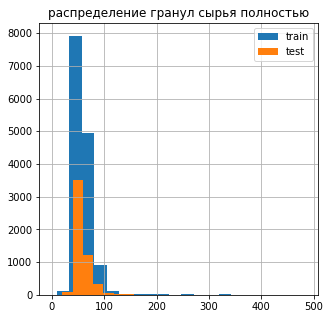

In [67]:
plt.figure(figsize=(5,5))
df_train['rougher.input.feed_size'].hist(bins=20, label='train')
df_test['rougher.input.feed_size'].hist(bins=20, label='test')
plt.legend(loc='upper right')
plt.title('распределение гранул сырья полностью')
plt.show()

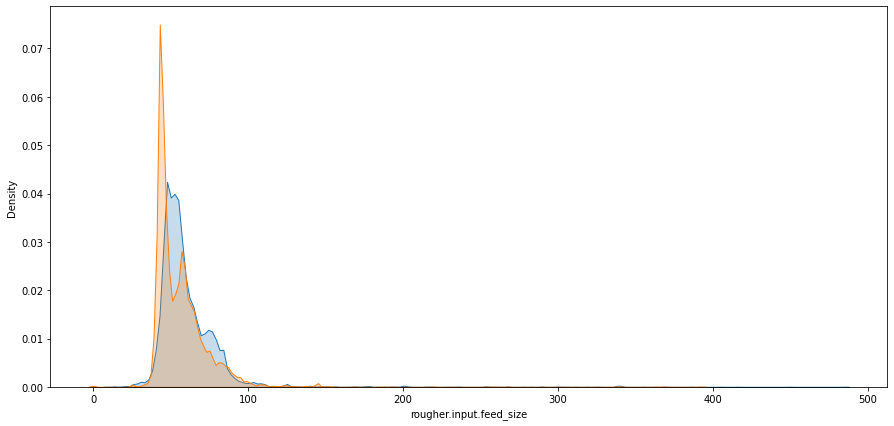

In [68]:
plt.figure(figsize=(15,7))
sns.kdeplot(df_train['rougher.input.feed_size'], shade = True ,  bw_adjust=0.3)
sns.kdeplot(df_test['rougher.input.feed_size'], shade = True,  bw_adjust=0.3)
plt.show()

После флотации распределение гранул между 20 и 100 частое, но на тестовой выбоки в этом диапозоне значения встречаютя чуть реже на примерно 1000. Есть так же редкие значения, их очень мало. Я бы не сказала что распределения похоже, но будем считать что похожи. 



(??? а что реально делать в такой ситуаци, я в чате увидела что тут проверяют гипотезу тестом, и пушут что не совпадает, нужно ли тут так проверять? )

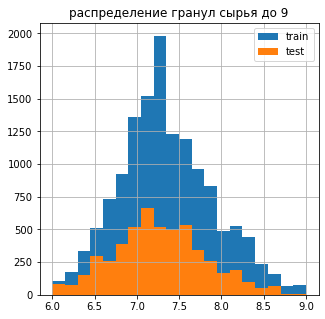

In [69]:
#после первичной очистки
plt.figure(figsize=(5,5))
df_train['primary_cleaner.input.feed_size'].hist(bins=20, label='train', range=(6,9))
df_test['primary_cleaner.input.feed_size'].hist(bins=20, label='test', range=(6,9))
plt.legend(loc='upper right')
plt.title('распределение гранул сырья до 9')
plt.show()

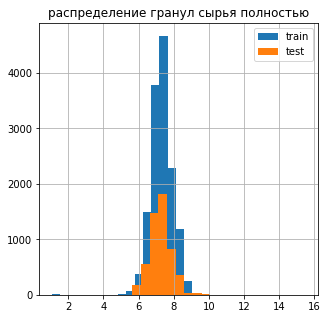

In [70]:
plt.figure(figsize=(5,5))
df_train['primary_cleaner.input.feed_size'].hist(bins=20, label='train')
df_test['primary_cleaner.input.feed_size'].hist(bins=20, label='test')
plt.legend(loc='upper right')
plt.title('распределение гранул сырья полностью')
plt.show()

После первой очистки диапозон распределений уже совпадает, и выбросов нет. Опять же количество наблюдений на тестовой выборки явно меньше в 2 раза точно. 

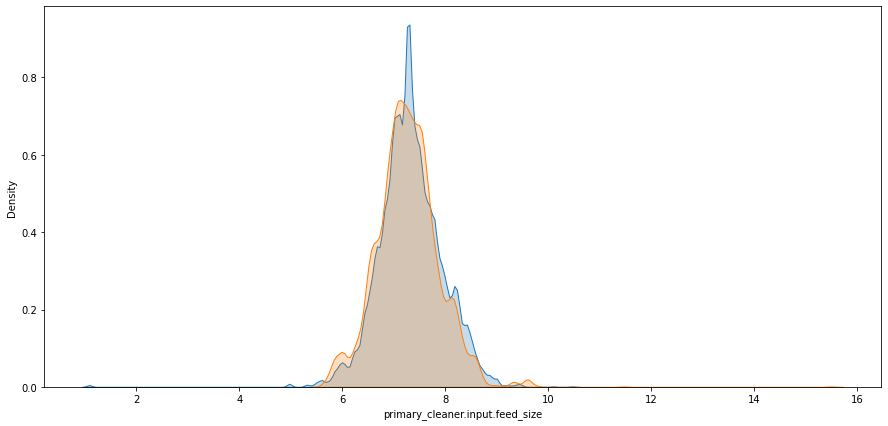

In [71]:
plt.figure(figsize=(15,7))
sns.kdeplot(df_train['primary_cleaner.input.feed_size'], shade = True ,  bw_adjust=0.5)
sns.kdeplot(df_test['primary_cleaner.input.feed_size'], shade = True,  bw_adjust=0.7)
plt.show()

### Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. 

In [72]:
#сырье
feed = df_train[['rougher.input.feed_ag', 
                 'rougher.input.feed_pb', 
                 'rougher.input.feed_sol', 
                 'rougher.input.feed_au']].copy()
feed['total concentration'] = (feed['rougher.input.feed_ag'] + 
                               feed['rougher.input.feed_pb'] + 
                               feed['rougher.input.feed_sol'] + 
                               feed['rougher.input.feed_au'])
feed

,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_au,total concentration
0,6.100378,2.284912,36.808594,6.486150,51.680034
1,6.161113,2.266033,35.753385,6.478583,50.659114
2,6.116455,2.159622,35.971630,6.362222,50.609929
3,6.043309,2.037807,36.862241,6.118189,51.061546
4,6.060915,1.786875,34.347666,5.663707,47.859163
...,...,...,...,...,...
14144,6.091855,4.617558,37.369774,5.335862,53.415050
14145,6.121323,4.144989,38.591551,4.838619,53.696482
14146,5.970515,4.020002,40.074026,4.525061,54.589604
14147,6.048130,3.902537,39.713906,4.362781,54.027355


In [73]:
#после флотации
rougher_conc = df_train[['rougher.output.concentrate_ag', 
                 'rougher.output.concentrate_pb', 
                 'rougher.output.concentrate_sol', 
                 'rougher.output.concentrate_au']].copy()
rougher_conc['total concentration'] = (rougher_conc['rougher.output.concentrate_ag'] + 
                                       rougher_conc['rougher.output.concentrate_pb'] + 
                                       rougher_conc['rougher.output.concentrate_sol'] + 
                                       rougher_conc['rougher.output.concentrate_au'])
rougher_conc

,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,total concentration
0,11.500771,7.101074,28.029297,19.793808,66.424950
1,11.615865,7.278807,28.067063,20.050975,67.012710
2,11.695753,7.216833,27.454037,19.737170,66.103793
3,11.915047,7.175616,27.341277,19.320810,65.752751
4,12.411054,7.240205,27.041023,19.216101,65.908382
...,...,...,...,...,...
14144,11.124896,10.984003,30.068876,18.603550,70.781325
14145,11.425983,10.888213,29.783972,18.441436,70.539603
14146,8.523497,8.955135,22.786467,15.111231,55.376330
14147,11.658799,10.655377,29.052742,17.834772,69.201689


In [74]:
# финальный концентрат
final_conc = df_train[['final.output.concentrate_ag', 
                 'final.output.concentrate_pb', 
                 'final.output.concentrate_sol', 
                 'final.output.concentrate_au']].copy()
final_conc['total concentration'] = (final_conc['final.output.concentrate_ag'] + 
                                       final_conc['final.output.concentrate_pb'] + 
                                       final_conc['final.output.concentrate_sol'] + 
                                       final_conc['final.output.concentrate_au'])
final_conc

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,total concentration
0,6.055403,9.889648,5.507324,42.192020,63.644396
1,6.029369,9.968944,5.257781,42.701629,63.957723
2,6.055926,10.213995,5.383759,42.657501,64.311180
3,6.047977,9.977019,4.858634,42.689819,63.573449
4,6.148599,10.142511,4.939416,42.774141,64.004667
...,...,...,...,...,...
14144,3.224920,11.356233,6.803482,46.713954,68.098589
14145,3.195978,11.349355,6.862249,46.866780,68.274362
14146,3.109998,11.434366,6.886013,46.795691,68.226068
14147,3.367241,11.625587,6.799433,46.408188,68.200449


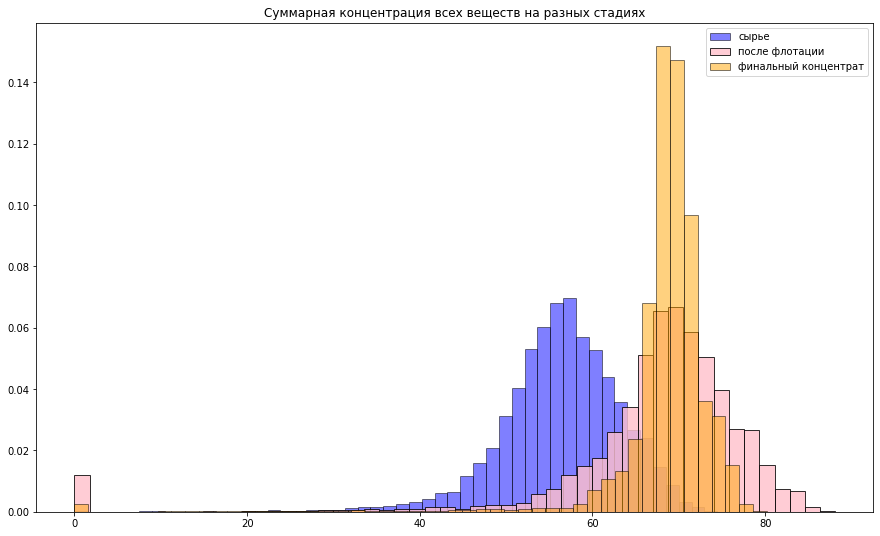

In [75]:
plt.figure(figsize=(15,9))
plt.hist(feed['total concentration'], 
         density = True, 
         histtype ='bar', 
         color = 'blue', 
         label = 'сырье', 
         edgecolor = 'black', 
         bins = 50, 
         alpha=0.5) 
plt.hist(rougher_conc['total concentration'], 
         density = True, 
         histtype ='bar', 
         color = 'pink', 
         label = 'после флотации', 
         edgecolor = 'black', 
         bins = 50,  
         alpha=0.8) 
plt.hist(final_conc['total concentration'], 
         density = True, 
         histtype ='bar', 
         color = 'orange', 
         label = 'финальный концентрат', 
         edgecolor = 'black', 
         bins = 50,  
         alpha=0.5)
plt.legend(prop ={'size': 10}) 
plt.title('Cуммарная концентрация всех веществ на разных стадиях')
plt.show()

По графику  видно что сумрная концентрация увеличилась после стадии флотации, на финальной стадии диапозон сохранился, но можем сказать что увеличилась частота значений в районе 70 в 2 раза.

Как и замечалось ранье присутствуют аномальные значения при 0. Думаю их стоит убрать. 

In [76]:
df_train = df_train[(df_train['rougher.output.concentrate_au'] != 0) & (df_train['rougher.output.concentrate_ag'] != 0) & (df_train['rougher.output.concentrate_pb'] != 0) & (df_train['rougher.output.concentrate_sol'] != 0)]
df_train = df_train[(df_train['final.output.concentrate_au'] != 0) & (df_train['final.output.concentrate_ag'] != 0) & (df_train['final.output.concentrate_pb'] != 0) & (df_train['final.output.concentrate_sol'] != 0)]

df = df[(df['rougher.output.concentrate_au'] != 0) & (df['rougher.output.concentrate_ag'] != 0) & (df['rougher.output.concentrate_pb'] != 0) & (df['rougher.output.concentrate_sol'] != 0)]
df = df[(df['final.output.concentrate_au'] != 0) & (df['final.output.concentrate_ag'] != 0) & (df['final.output.concentrate_pb'] != 0) & (df['final.output.concentrate_sol'] != 0)]
df_train.shape

(13792, 87)

In [77]:
df_train = df_train.drop('date', axis= 1 )
df_test = df_test.drop('date', axis= 1 )
df = df.drop('date', axis= 1 )
df_test.shape

(5290, 54)

## Модель

In [78]:
#удалили из обучающей выбоки столбцы которых нет в тестовой выборки, чтобы небыло утечки целевых признаков. 
missing = list(inaccessible_signs)
missing.remove('final.output.recovery') #удаляем из списка отсутствующих столбцов целевые признаки
missing.remove('rougher.output.recovery')
# 86 df_train.shape
for i in missing:
    df_train = df_train.drop(i, axis= 1 )
df_train.shape

(13792, 54)

In [79]:
df_test.shape

(5290, 54)

### sMAPE.

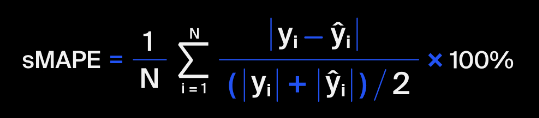

In [80]:
def smape(target, predicted):
    fraction = (2 * abs(target - predicted)) / (abs(target) + abs(predicted))
    sm = (1 / len (predicted)) * sum(fraction) * 100
    return sm
#target = np.array([12, 13, 14, 15, 15,22, 27])
#predicted = np.array([11, 13, 14, 14, 15, 16, 18])
#smape(target, predicted)

In [81]:
#target = np.array([12, 13, 14, 15, 15,22, 27])
#predicted = np.array([11, 13, 14, 14, 15, 16, 18])
#mean_absolute_percentage_error(target, predicted)

Итоговая метрика складывается из двух величин: 
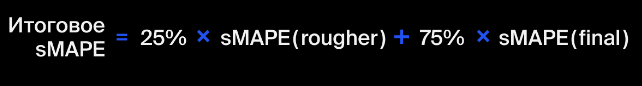

In [82]:
def final_smape(rougher, final):
    final = 0.25 * rougher + 0.75 * final
    return final

### Обучение разныx моделей

In [83]:
features_train = df_train.drop(['final.output.recovery', 'rougher.output.recovery'], axis=1)
target_train_rougher = df_train['rougher.output.recovery']
target_train_final = df_train['final.output.recovery']

In [84]:
state = RandomState(12345)

#### DecisionTreeRegressor

In [85]:
best_final_smape_DTR = -10
best_depth_DTR = 0
best_smape_DTR = []
for i in tqdm(range(1, 20, 1)):
    model_DTR_rougher = DecisionTreeRegressor(max_depth=i, random_state=state)  #флотация
    scores_rougher = cross_val_score(model_DTR_rougher,
                             features_train,
                             target_train_rougher,
                             cv=5,
                             scoring=make_scorer(smape, greater_is_better=False))  
    #функция преобразует метрики в вызываемые объекты, которые можно использовать для оценки модели.
    final_score_rougher = scores_rougher.mean()  # среднее для флотации
    
    model_DTR_final = DecisionTreeRegressor(max_depth=i, random_state=state)   #финальная
    scores_final = cross_val_score(model_DTR_final,
                             features_train,
                             target_train_final,
                             cv=5, 
                             scoring=make_scorer(smape, greater_is_better=False))
    final_score_final = scores_final.mean()     # среднее для финальой
    final_smape_DTR = final_smape(final_score_rougher, final_score_final)
    best_smape_DTR.append(final_smape_DTR)
    
    if final_smape_DTR > best_final_smape_DTR:
        best_final_smape_DTR = final_smape_DTR 
        best_depth_DTR = i

print('sMAPE:', best_final_smape_DTR, 'Максимальная глубина:', best_depth_DTR)

100%|██████████| 19/19 [01:25<00:00,  4.49s/it]

sMAPE: -8.925785452030953 Максимальная глубина: 3


https://towardsdatascience.com/how-to-master-the-subtle-art-of-train-test-set-generation-7a8408bcd578
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring

#### RandomForestRegressor

In [86]:
%%time
best_final_smape_RTR = -10
best_depth_RTR = 0
best_est_RTR = 0
best_smape_RTR = []
for i in range(1, 5, 1):
    for est in range(1, 3, 1):
        model_RTR_rougher = RandomForestRegressor(max_depth=i, random_state=state, n_estimators=est)  #флотация
        scores_rougher = cross_val_score(model_RTR_rougher,
                                         features_train,
                                         target_train_rougher,
                                         cv=5,
                                         scoring=make_scorer(smape, greater_is_better=False))  
    #функция преобразует метрики в вызываемые объекты, которые можно использовать для оценки модели.
        final_score_rougher = scores_rougher.mean()  # среднее для флотации
    
        model_RTR_final = RandomForestRegressor(max_depth=i, random_state=state, n_estimators=est)   #финальная
        scores_final = cross_val_score(model_RTR_final,
                                       features_train,
                                       target_train_final,
                                       cv=5, 
                                       scoring=make_scorer(smape, greater_is_better=False))
        final_score_final = scores_final.mean()     # среднее для финальой
        final_smape_RTR = final_smape(final_score_rougher, final_score_final)
        best_smape_RTR.append(final_smape_RTR)
    
        if final_smape_RTR > best_final_smape_RTR:
            best_final_smape_RTR = final_smape_RTR 
            best_depth_RTR = i
            best_est_RTR = est

#print(best_smape_RTR)
print('sMAPE:', best_final_smape_RTR, 'Максимальная глубина:', best_depth_RTR, "Количество деревьев:", best_est_RTR)

sMAPE: -8.587270440851361 Максимальная глубина: 4 Количество деревьев: 2
CPU times: user 10.8 s, sys: 20.9 ms, total: 10.8 s
Wall time: 10.8 s


#### LinearRegression

In [87]:
best_smape_LR = []
best_final_smape_LR = -10
model_LR_rougher = LinearRegression()  #флотация
scores_rougher = cross_val_score(model_LR_rougher,
                                 features_train,
                                 target_train_rougher,
                                 cv=5,
                                 scoring=make_scorer(smape, greater_is_better=False))  
    #функция преобразует метрики в вызываемые объекты, которые можно использовать для оценки модели.
final_score_rougher = scores_rougher.mean()  # среднее для флотации

model_LR_final = LinearRegression()   #финальная
scores_final = cross_val_score(model_LR_final,
                               features_train,
                               target_train_final,
                               cv=5, 
                               scoring=make_scorer(smape, greater_is_better=False))
final_score_final = scores_final.mean()     # среднее для финальой
final_smape_LR = final_smape(final_score_rougher, final_score_final)
best_smape_LR.append(final_smape_LR)
    
if final_smape_LR > best_final_smape_LR:
    best_final_smape_LR = final_smape_LR 

print(best_smape_LR)
#print('sMAPE:', best_final_smape_LR)

[-10.05926144348279]


Лучшая модель по паказателям sMAPE - это модель RandomForestRegressor. Так как у нее самый маленький процент ошибки.(в нашем случае самый большой потому что получаются отрицательные числа)

### Проверим лучшую модель на тестовой выборки.

In [88]:
df_test['rougher.output.recovery']

0       89.993421
1       88.089657
2       88.412756
3       87.360133
4       83.236367
          ...    
5285    95.172585
5286    94.575036
5287    93.018138
5288    92.599042
5289    91.177695
Name: rougher.output.recovery, Length: 5290, dtype: float64

In [89]:
features_test = df_test.drop(['final.output.recovery', 'rougher.output.recovery'], axis=1)
target_test_rougher = df_test['rougher.output.recovery']
target_test_final = df_test['final.output.recovery']

In [90]:
model_RTR_rougher_b = RandomForestRegressor(max_depth=4, random_state=state, n_estimators=2)
model_RTR_rougher_b.fit(features_train, target_train_rougher) 
predictions_RTR_rougher = model_RTR_rougher_b.predict(features_test) 
smape_RTR_rougher = smape(target_test_rougher, predictions_RTR_rougher)

model_RTR_final_b = RandomForestRegressor(max_depth=4, random_state=state, n_estimators=2)
model_RTR_final_b.fit(features_train, target_train_final) 
predictions_RTR_final = model_RTR_final_b.predict(features_test) 
smape_RTR_final = smape(target_test_final, predictions_RTR_final)

smape_RTR = final_smape(smape_RTR_rougher, smape_RTR_final)
smape_RTR

9.522456116740269

In [95]:
dummy_clf_1 = DummyRegressor(strategy = "mean")
dummy_clf_1.fit(features_train, target_train_rougher)
predictions_dummy_clf_rougher = dummy_clf_1.predict(features_test)
score_rougher = smape(target_test_rougher, predictions_dummy_clf_rougher)

dummy_clf_2 = DummyRegressor(strategy = "mean")
dummy_clf_2.fit(features_train, target_train_final)
predictions_dummy_clf_final = dummy_clf_2.predict(features_test)
score_final = smape(target_test_final, predictions_dummy_clf_final)

smape_dummy = final_smape(score_rougher, score_final)
smape_dummy

9.821468391820279

Лучшая модель RandomForestRegressor, на тестовой выборке показатель намного меньше чем у классификатора DummyClassifier(случайная модель). Конечно на обучащей выборке показатель был поменьше но не сильно. Модель предсказывает коэффициент восстановления золота из золотосодержащей руды с точностью 9.559.

## Чек-лист готовности проекта

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке выполнения
- [ ]  Выполнен шаг 1: данные подготовлены
    - [ ]  Проверена формула вычисления эффективности обогащения
    - [ ]  Проанализированы признаки, недоступные в тестовой выборке
    - [ ]  Проведена предобработка данных
- [ ]  Выполнен шаг 2: данные проанализированы
    - [ ]  Исследовано изменение концентрации элементов на каждом этапе
    - [ ]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [ ]  Исследованы суммарные концентрации
- [ ]  Выполнен шаг 3: построена модель прогнозирования
    - [ ]  Написана функция для вычисления итогового *sMAPE*
    - [ ]  Обучено и проверено несколько моделей
    - [ ]  Выбрана лучшая модель, её качество проверено на тестовой выборке